In [2]:
import pandas as pd
import numpy as np

In [10]:
data = {
    'producto': ['Manzana', 'Manzana', 'Banana', 'Banana', 'Cereza', 'Cereza', 'Manzana', 'Banana', 'Cereza'],
    'categoría': ['Fruta', 'Fruta', 'Fruta', 'Legumbre', 'Fruta', 'Fruta', 'Fruta', 'Legumbre', 'Fruta'],
    'ventas': [50, 30, 20, 15, 10, 25, 45, 55, 40],
    'precio_unitario': [0.5, 0.5, 0.3, 0.3, 0.8, 0.8, 0.5, 0.3, 0.8],
    'fecha': pd.date_range(start='2024-01-01', periods=9, freq='D')
}

df = pd.DataFrame(data)
display(df)

,producto,categoría,ventas,precio_unitario,fecha
0,Manzana,Fruta,50,0.5,2024-01-01
1,Manzana,Fruta,30,0.5,2024-01-02
2,Banana,Fruta,20,0.3,2024-01-03
3,Banana,Legumbre,15,0.3,2024-01-04
4,Cereza,Fruta,10,0.8,2024-01-05
5,Cereza,Fruta,25,0.8,2024-01-06
6,Manzana,Fruta,45,0.5,2024-01-07
7,Banana,Legumbre,55,0.3,2024-01-08
8,Cereza,Fruta,40,0.8,2024-01-09


In [4]:
total_ventas_por_producto = df.groupby('producto')['ventas'].sum()
display(total_ventas_por_producto)

producto
Banana      90
Cereza      75
Manzana    125
Name: ventas, dtype: int64

In [5]:
precio_promedio_por_producto = df.groupby('producto')['precio_unitario'].mean()
display(precio_promedio_por_producto)

producto
Banana     0.3
Cereza     0.8
Manzana    0.5
Name: precio_unitario, dtype: float64

In [7]:
resumen_ventas = df.groupby('producto')['ventas'].agg(['sum', 'mean','min'])
display(resumen_ventas)

,sum,mean,min
producto,,,
Banana,90,30.000000,15
Cereza,75,25.000000,10
Manzana,125,41.666667,30


In [11]:
resumen_categoria = df.groupby(['categoría', 'producto']).agg(
    total_ventas=('ventas', 'sum'),
    precio_promedio=('precio_unitario', 'mean')
)
display(resumen_categoria)

total_ventas  precio_promedio
categoría producto                               
Fruta     Banana              20              0.3
          Cereza              75              0.8
          Manzana            125              0.5
Legumbre  Banana              70              0.3

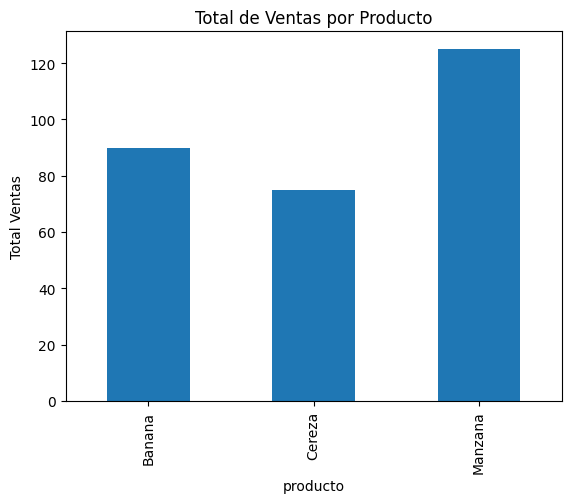

In [12]:
import matplotlib.pyplot as plt
total_ventas_por_producto.plot(kind='bar')
plt.title('Total de Ventas por Producto')
plt.ylabel('Total Ventas')
plt.show()